In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
np.random.seed(0)

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.tail()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
9559,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.01570,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.00017,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.00769,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,FALSE POSITIVE,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.00285,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9563,FALSE POSITIVE,0,0,1,1,4.856035,6.356000e-05,-6.356000e-05,135.993300,0.01080,...,-225.0,4.385,0.054,-0.216,1.193,0.410,-0.137,297.00977,47.121021,14.826


# Create a Train Test Split

Use `koi_disposition` for the y values

In [3]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [5]:
features =['koi_fpflag_nt', 'koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec']
X= df[features]
y = df["koi_disposition"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
X_train.shape

(6558, 4)

# Pre-processing

Scale the data using the MinMaxScaler

In [8]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


C:\users\MeenakshiNadimuthu\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\users\MeenakshiNadimuthu\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
C:\users\MeenakshiNadimuthu\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Train the Support Vector Machine

In [9]:
svmmodel = SVC(kernel='linear')
svmmodel

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
svmmodel.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
print(f"Training Data Score: {svmmodel.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svmmodel.score(X_test_scaled, y_test)}")

Training Data Score: 0.7500762427569381
Testing Data Score: 0.7543458371454712


# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [12]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

params = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

gridcv = GridSearchCV(svmmodel, params, verbose=3)

In [13]:
# Train the model with GridSearch
gridcv.fit(X_train, y_train)

C:\users\MeenakshiNadimuthu\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.7495429616087751, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.7482837528604119, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.7524027459954233, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.7495429616087751, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.7482837528604119, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.7524027459954233, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.7495429616087751, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.7482837528604119, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.7524027459954233, total=   0.1s
[CV] C=1, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   17.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [14]:
print(gridcv.best_params_)
print(gridcv.best_score_)

{'C': 1, 'gamma': 0.0001}
0.7500762427569381


In [15]:
svmpredictions = gridcv.predict(X_test)

In [16]:
svmpredictions

array(['FALSE POSITIVE', 'CONFIRMED', 'CONFIRMED', ..., 'CONFIRMED',
       'FALSE POSITIVE', 'CONFIRMED'], dtype=object)

# Classification Report for SVM

In [17]:
print(classification_report(y_test, svmpredictions,
                            target_names=["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.00      0.00      0.00       523
FALSE POSITIVE       0.53      0.98      0.69       594
     CANDIDATE       0.98      1.00      0.99      1069

     micro avg       0.75      0.75      0.75      2186
     macro avg       0.50      0.66      0.56      2186
  weighted avg       0.62      0.75      0.67      2186



C:\users\MeenakshiNadimuthu\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# KNN classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 0.750/0.754
k: 3, Train/Test Score: 0.750/0.754
k: 5, Train/Test Score: 0.750/0.754
k: 7, Train/Test Score: 0.750/0.754
k: 9, Train/Test Score: 0.750/0.754
k: 11, Train/Test Score: 0.740/0.724
k: 13, Train/Test Score: 0.740/0.724
k: 15, Train/Test Score: 0.740/0.724
k: 17, Train/Test Score: 0.740/0.724
k: 19, Train/Test Score: 0.740/0.724


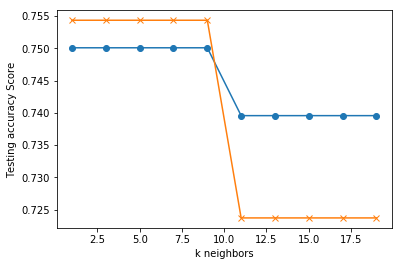

In [19]:
## Code to find the best K value 
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.724


In [22]:
knnpredictions = knn.predict(X_test)
knnpredictions

array(['FALSE POSITIVE', 'CANDIDATE', 'CANDIDATE', ..., 'CANDIDATE',
       'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [23]:
print(classification_report(y_test, knnpredictions,
                            target_names=["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.47      0.98      0.63       523
FALSE POSITIVE       0.00      0.00      0.00       594
     CANDIDATE       0.98      1.00      0.99      1069

     micro avg       0.72      0.72      0.72      2186
     macro avg       0.48      0.66      0.54      2186
  weighted avg       0.59      0.72      0.64      2186



C:\users\MeenakshiNadimuthu\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(n_estimators=250)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
print(f"Random Forest Training data score {rf.score(X_train, y_train)}")
print(f"Random Forest Testing data score {rf.score(X_test, y_test)}")

Random Forest Training data score 0.7500762427569381
Random Forest Testing data score 0.7543458371454712


In [27]:
rfpredictions = rf.predict(X_test)
rfpredictions

array(['FALSE POSITIVE', 'CONFIRMED', 'CONFIRMED', ..., 'CONFIRMED',
       'FALSE POSITIVE', 'CONFIRMED'], dtype=object)

In [28]:
print(classification_report(y_test, rfpredictions,
                            target_names=["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.00      0.00      0.00       523
FALSE POSITIVE       0.53      0.98      0.69       594
     CANDIDATE       0.98      1.00      0.99      1069

     micro avg       0.75      0.75      0.75      2186
     macro avg       0.50      0.66      0.56      2186
  weighted avg       0.62      0.75      0.67      2186



C:\users\MeenakshiNadimuthu\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# DataFrame comparison of prediction of all models

In [29]:
ComparisonDF = pd.DataFrame({"SVM Predictions":svmpredictions ,
                             "KNN Predictions" :knnpredictions,
                             "Random Forest Predictions" : rfpredictions,
                             "Actual values":y_test})

IndexedComparisonDF = ComparisonDF.set_index("Actual values")
IndexedComparisonDF.head(10)

,SVM Predictions,KNN Predictions,Random Forest Predictions
Actual values,,,
FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
CANDIDATE,CONFIRMED,CANDIDATE,CONFIRMED
CONFIRMED,CONFIRMED,CANDIDATE,CONFIRMED
CONFIRMED,CONFIRMED,CANDIDATE,CONFIRMED
CANDIDATE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
CANDIDATE,CONFIRMED,CANDIDATE,CONFIRMED
CONFIRMED,CONFIRMED,CANDIDATE,CONFIRMED
CONFIRMED,CONFIRMED,CANDIDATE,CONFIRMED
